In [42]:
# !pip install mplsoccer
# !pip install statsbombpy

In [306]:
from mplsoccer.pitch import Pitch
import matplotlib.patches as patches

In [1]:
from statsbombpy import sb
import warnings
from pandas.errors import SettingWithCopyWarning
from statsbombpy.api_client import NoAuthWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=NoAuthWarning)

In [6]:
sb.matches(competition_id=9, season_id=281).head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2


In [300]:
competition_id = 9
season_id = 281

all_events = []
matches = sb.matches(competition_id=competition_id, season_id=season_id)
matches_ids = matches["match_id"]
for match_id in matches_ids:
    events = sb.events(match_id=match_id)
    all_events.append(events) 

events_df = pd.concat(all_events, ignore_index=True)
passes_df = events_df[events_df['type'] == 'Pass'].copy()  # Filter for passes

passes_df['y'] = passes_df['location'].apply(lambda loc: loc[0])
passes_df['x'] = passes_df['location'].apply(lambda loc: loc[1])

y_intervals = [(i*120/6, (i+1)*120/6) for i in range(6)]  # Y-axis intervals
x_intervals = [(i*80/4, (i+1)*80/4) for i in range(4)]  # X-axis intervals

def get_interval(value, intervals):
    for start, end in intervals:
        if start <= value < end:
            return (start, end)
    return None

counts_list = []
for x_interval in x_intervals:
    for y_interval in y_intervals:
        count = passes_df[
            (passes_df['x'] >= x_interval[0]) & (passes_df['x'] <= x_interval[1]) &
            (passes_df['y'] >= y_interval[0]) & (passes_df['y'] <= y_interval[1])
        ].shape[0]
        counts_list.append({
            'x_interval': x_interval,
            'y_interval': y_interval,
            'count': count
        })

counts_df = pd.DataFrame(counts_list)
counts_df['percentage'] = round(counts_df['count'] / counts_df['count'].sum() * 100, 3)
counts_df.sort_values(by="percentage", ascending=False)

,x_interval,y_interval,count,percentage
14,"(40.0, 60.0)","(40.0, 60.0)",285,8.615
8,"(20.0, 40.0)","(40.0, 60.0)",274,8.283
3,"(0.0, 20.0)","(60.0, 80.0)",218,6.590
9,"(20.0, 40.0)","(60.0, 80.0)",209,6.318
15,"(40.0, 60.0)","(60.0, 80.0)",206,6.227
21,"(60.0, 80.0)","(60.0, 80.0)",204,6.167
20,"(60.0, 80.0)","(40.0, 60.0)",193,5.834
2,"(0.0, 20.0)","(40.0, 60.0)",185,5.593
4,"(0.0, 20.0)","(80.0, 100.0)",167,5.048
7,"(20.0, 40.0)","(20.0, 40.0)",153,4.625


In [301]:
passes_df.location.value_counts()
passes_df.location.value_counts()


location
[120.0, 80.0]    21
[120.0, 0.1]     18
[60.0, 40.0]      9
[61.0, 40.1]      7
[70.7, 80.0]      2
                 ..
[72.7, 27.1]      1
[84.9, 23.9]      1
[83.3, 25.7]      1
[13.0, 34.5]      1
[43.5, 64.3]      1
Name: count, Length: 3196, dtype: int64

ValueError: Unknown format code 'd' for object of type 'float'

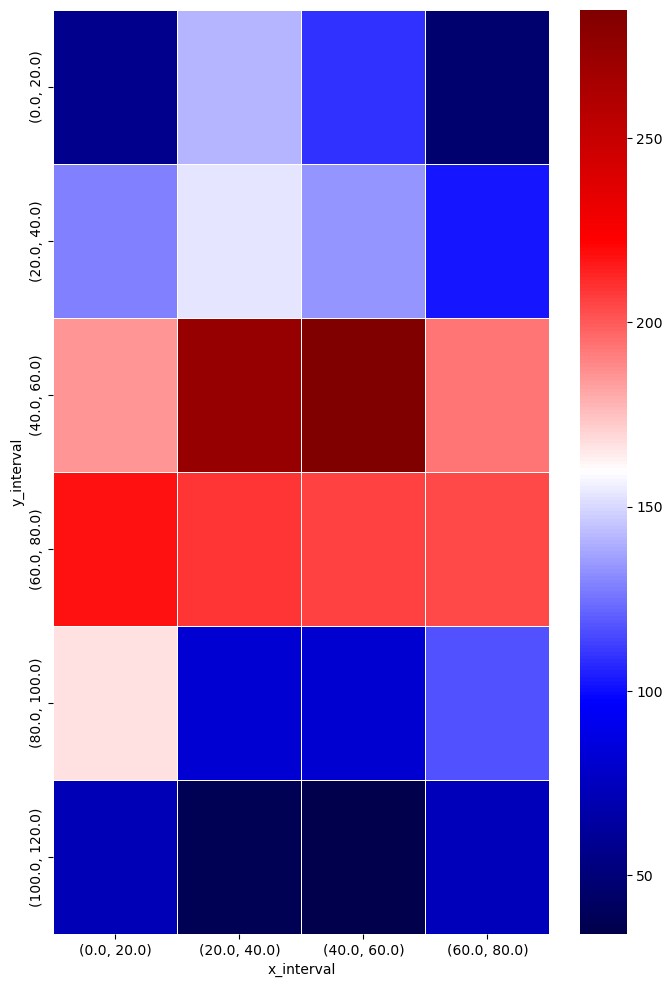

In [302]:
data = counts_df.copy()
df = pd.DataFrame(data)
pivot_table = df.pivot_table(index='y_interval', columns='x_interval', values='count', fill_value=0)

plt.figure(figsize=(8, 12))
sns.heatmap(pivot_table, annot=True, cmap="seismic", cbar=True, fmt="d", linewidths=0.5)
plt.title("Heatmap of Pass Counts by Interval")
plt.xlabel("X Interval")
plt.ylabel("Y Interval")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Rotate y labels for better readability
plt.show() 
plt.show()

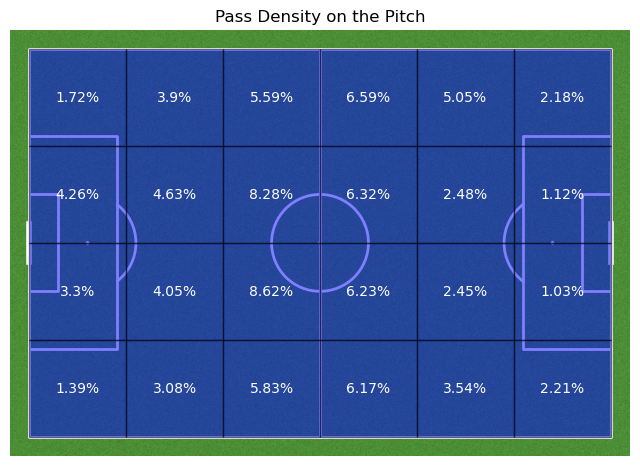

In [304]:
data = counts_df.copy()
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')

fig, ax = plt.subplots(figsize=(8, 12))
pitch.draw(ax=ax)

def draw_intervals(df, ax):
    for _, row in df.iterrows():
        x_start, x_end = row['y_interval']
        y_start, y_end = row['x_interval']
        count = row['count']
        percentage = row['percentage']
        
        # Create a rectangle patch
        rect = patches.Rectangle(
            (x_start, y_start), 
            x_end - x_start, 
            y_end - y_start,
            linewidth=1,
            edgecolor='black',
            facecolor='blue',
            alpha=0.5
        )
        
        # Add rectangle to the plot
        ax.add_patch(rect)
        
        # Add text to the rectangles
        ax.text(
            (x_start + x_end) / 2, 
            (y_start + y_end) / 2,
            f'{percentage}%',
            ha='center', va='center',
            fontsize=10, color='white'
        )

draw_intervals(counts_df, ax)
plt.title('Pass Density on the Pitch')
plt.show()